<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1>Prediction in new patients with XGBoost

</h1> </div>

- [New Patients](#newp)
- [New patient information](#infop)
- [Transform and Predict](#tp)
- [Actual vs. Predicted Comparison Chart](#grafica)
- [Results](#results)
- [Conclusion](#conclusion)

<div style="color:#37475a"><h2>Imported modules</h2> </div>

---


In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow.xgboost

<div style="color:#37475a"><h2>Transformer load and model</h2> </div>

---

In [2]:
experiment_name = "Alzheimer_Preprocesamiento"
run_id = "a9302cdf7df7439d8a59ea7c3fb148ff"

In [4]:
# --- Transformer load and model---
prep_path = mlflow.artifacts.download_artifacts(
    run_id=run_id,
    artifact_path="preprocessor/preprocessor.pkl"
)

with open(prep_path, "rb") as f:
    transformador = pickle.load(f)

modelo = mlflow.xgboost.load_model(
    model_uri="models:/Alzheimer_XGBoost/1"
)


<div id="newp" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>New Patients</h2> </div>



In [5]:
# --- new patients ---
nuevos_samples = pd.DataFrame([
    {
        "PatientID": 6901,
        "Age": 72,
        "Gender": 0,
        "Ethnicity": 1,
        "EducationLevel": 3,
        "BMI": 23.5,
        "Smoking": 0,
        "AlcoholConsumption": 10,
        "PhysicalActivity": 5,
        "DietQuality": 2,
        "SleepQuality": 6,
        "FamilyHistoryAlzheimers": 0,
        "CardiovascularDisease": 0,
        "Diabetes": 0,
        "Depression": 0,
        "HeadInjury": 0,
        "Hypertension": 1,
        "SystolicBP": 130,
        "DiastolicBP": 80,
        "CholesterolTotal": 200,
        "CholesterolLDL": 130,
        "CholesterolHDL": 50,
        "CholesterolTriglycerides": 150,
        "MMSE": 28,
        "FunctionalAssessment": 5,
        "MemoryComplaints": 0,
        "BehavioralProblems": 0,
        "ADL": 1,
        "Confusion": 0,
        "Disorientation": 0,
        "PersonalityChanges": 0,
        "DifficultyCompletingTasks": 1,
        "Forgetfulness": 0,
        "DoctorInCharge": "DrA"
    },
    {
        "PatientID": 6902,
        "Age": 78,
        "Gender": 0,
        "Ethnicity": 2,
        "EducationLevel": 1,
        "BMI": 28,
        "Smoking": 0,
        "AlcoholConsumption": 0,
        "PhysicalActivity": 2,
        "DietQuality": 1,
        "SleepQuality": 4,
        "FamilyHistoryAlzheimers": 1,
        "CardiovascularDisease": 1,
        "Diabetes": 0,
        "Depression": 1,
        "HeadInjury": 0,
        "Hypertension": 1,
        "SystolicBP": 150,
        "DiastolicBP": 90,
        "CholesterolTotal": 220,
        "CholesterolLDL": 160,
        "CholesterolHDL": 40,
        "CholesterolTriglycerides": 180,
        "MMSE": 22,
        "FunctionalAssessment": 8,
        "MemoryComplaints": 1,
        "BehavioralProblems": 1,
        "ADL": 3,
        "Confusion": 1,
        "Disorientation": 1,
        "PersonalityChanges": 1,
        "DifficultyCompletingTasks": 1,
        "Forgetfulness": 1,
        "DoctorInCharge": "DrC"
    },
    {
        "PatientID": 6903,
        "Age": 70,
        "Gender": 1,
        "Ethnicity": 1,
        "EducationLevel": 2,
        "BMI": 24.5,
        "Smoking": 0,
        "AlcoholConsumption": 3,
        "PhysicalActivity": 6,
        "DietQuality": 3,
        "SleepQuality": 7,
        "FamilyHistoryAlzheimers": 0,
        "CardiovascularDisease": 0,
        "Diabetes": 0,
        "Depression": 0,
        "HeadInjury": 0,
        "Hypertension": 0,
        "SystolicBP": 125,
        "DiastolicBP": 78,
        "CholesterolTotal": 190,
        "CholesterolLDL": 120,
        "CholesterolHDL": 55,
        "CholesterolTriglycerides": 140,
        "MMSE": 27,
        "FunctionalAssessment": 4,
        "MemoryComplaints": 0,
        "BehavioralProblems": 0,
        "ADL": 1,
        "Confusion": 0,
        "Disorientation": 0,
        "PersonalityChanges": 0,
        "DifficultyCompletingTasks": 0,
        "Forgetfulness": 0,
        "DoctorInCharge": "DrD"
    },
    {
        "PatientID": 6904,
        "Age": 75,
        "Gender": 0,
        "Ethnicity": 0,
        "EducationLevel": 1,
        "BMI": 29,
        "Smoking": 1,
        "AlcoholConsumption": 8,
        "PhysicalActivity": 2,
        "DietQuality": 1,
        "SleepQuality": 5,
        "FamilyHistoryAlzheimers": 1,
        "CardiovascularDisease": 1,
        "Diabetes": 1,
        "Depression": 1,
        "HeadInjury": 0,
        "Hypertension": 1,
        "SystolicBP": 145,
        "DiastolicBP": 88,
        "CholesterolTotal": 230,
        "CholesterolLDL": 170,
        "CholesterolHDL": 42,
        "CholesterolTriglycerides": 190,
        "MMSE": 23,
        "FunctionalAssessment": 7,
        "MemoryComplaints": 1,
        "BehavioralProblems": 1,
        "ADL": 2,
        "Confusion": 1,
        "Disorientation": 1,
        "PersonalityChanges": 1,
        "DifficultyCompletingTasks": 1,
        "Forgetfulness": 1,
        "DoctorInCharge": "DrE"
    }
])




<div id="infop" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>New patient information</h2> </div>



In [6]:
data_riesgo_cualitativo = {
    'PatientID': [6901, 6902, 6903, 6904],
    'Age': [72, 78, 70, 75],
    'MMSE (Max 30)': [28, 22, 27, 23],
    'Family History (1=Yes)': [0, 1, 0, 1],
    'Key Symptoms (Total 5)': [1, 5, 0, 5],
    'Alzheimer Risk': ['Low = 0', 'Very High = 1', 'Low = 0', 'Very High = 1'],
    'Justification': [
        'Excellent MMSE (high score), few symptoms, and no family history.',
        'Very low MMSE score, positive family history, and all 5 key symptoms present.',
        'Good MMSE, no symptoms, and no family history.',
        'Low MMSE score, positive family history, and all 5 key symptoms present.'
    ]
}

df_riesgo_cualitativo = pd.DataFrame(data_riesgo_cualitativo)
df_riesgo_cualitativo

,PatientID,Age,MMSE (Max 30),Family History (1=Yes),Key Symptoms (Total 5),Alzheimer Risk,Justification
0,6901,72,28,0,1,Low = 0,"Excellent MMSE (high score), few symptoms, and..."
1,6902,78,22,1,5,Very High = 1,"Very low MMSE score, positive family history, ..."
2,6903,70,27,0,0,Low = 0,"Good MMSE, no symptoms, and no family history."
3,6904,75,23,1,5,Very High = 1,"Low MMSE score, positive family history, and a..."


<div style="color:#37475a"><h2>New Variables</h2> </div>

---

In [7]:
# --- Create derived variables ---
data = nuevos_samples.copy()
data['age_mmse_interaction'] = data['Age'] * data['MMSE']
data['cognitive_decline_score'] = data['MMSE'] + data['FunctionalAssessment'] + data['ADL']
data['vascular_risk_score'] = data['Hypertension'] + data['CardiovascularDisease'] + data['Diabetes'] + data['Smoking']
data['cholesterol_ratio'] = data['CholesterolLDL'] / (data['CholesterolHDL'] + 0.01)
data['bp_ratio'] = data['SystolicBP'] / (data['DiastolicBP'] + 0.01)
data['symptom_count'] = (
    data['Confusion'] +
    data['Disorientation'] +
    data['PersonalityChanges'] +
    data['DifficultyCompletingTasks'] +
    data['Forgetfulness'] +
    data['MemoryComplaints'] +
    data['BehavioralProblems']
)
data['lifestyle_score'] = data['PhysicalActivity'] + data['DietQuality'] + data['SleepQuality']
data['age_group'] = pd.cut(data['Age'], bins=[59, 70, 80, 91], labels=[0, 1, 2])

features = data.drop(columns=["PatientID", "DoctorInCharge"])



<div id="tp" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Transform and Predict</h2> </div>



In [8]:
# --- Transform and Predict ---
X_trans = transformador.transform(features)

predxg = modelo.predict(X_trans)

print("Predictions with XGBoost:", predxg)


Predictions with XGBoost: [0 1 0 1]


<div style="color:#37475a"><h2>Prediction Probability</h2> </div>

---

In [10]:
pred_prob = modelo.predict_proba(X_trans)
print("Predictions XGBoost: \n", pred_prob)

Predictions XGBoost: 
 [[0.987432   0.01256798]
 [0.07974303 0.920257  ]
 [0.9867383  0.01326166]
 [0.13227528 0.8677247 ]]


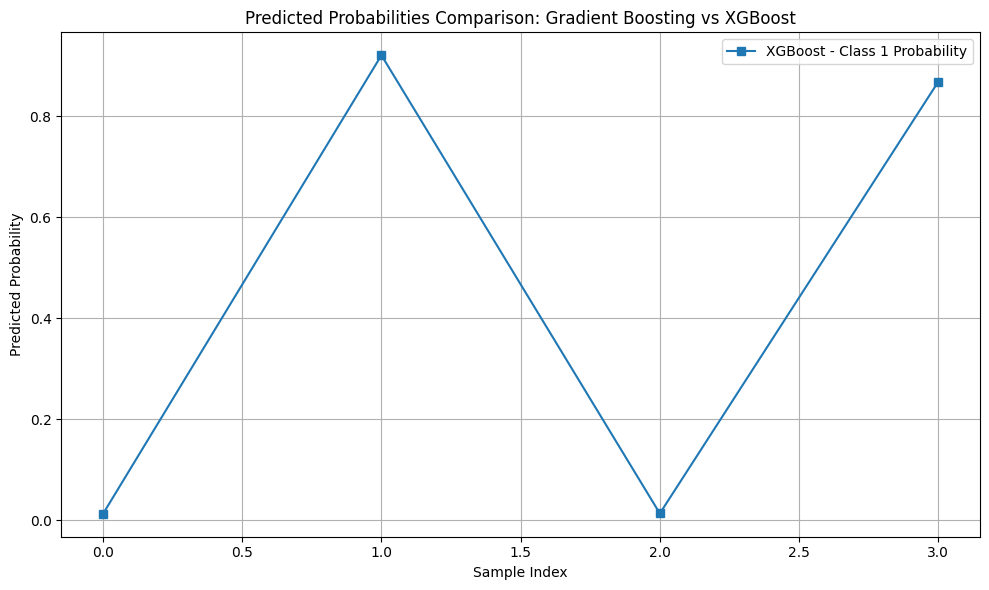

In [13]:
# Probabilities obtained
xgb_probs = modelo.predict_proba(X_trans)

# Number of samples
n = len(xgb_probs)
indices = np.arange(n)

plt.figure(figsize=(10,6))

plt.plot(indices, xgb_probs[:,1], marker='s', label="XGBoost - Class 1 Probability")

plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability")
plt.title("Predicted Probabilities Comparison: Gradient Boosting vs XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusion**

Although in phase 2 of training and validation the XGBoost model achieved better overall metrics (such as Accuracy and F1-Score), a different behavior was observed in the practical phase with new samples. When comparing the prediction probabilities, the Gradient Boosting model showed greater confidence and stability in its results, assigning higher and clearer probabilities to the correct class in most cases.

   PatientID  Age  Gender  Prediccion_Diagnosis
0       6901   72       0                     0
1       6902   78       0                     1
2       6903   70       1                     0
3       6904   75       0                     1


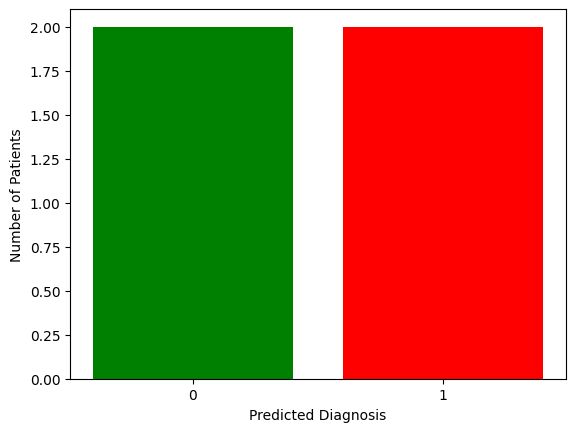

In [15]:
resultados = nuevos_samples[['PatientID', 'Age', 'Gender']].copy()
resultados['Prediccion_Diagnosis'] = predxg

print(resultados)

# --- Prediction count graph ---
conteo = resultados['Prediccion_Diagnosis'].value_counts()
plt.bar(conteo.index.astype(str), conteo.values, color=['green','red'])
plt.xlabel('Predicted Diagnosis')
plt.ylabel('Number of Patients')
plt.savefig("distribicion_diagnostico.png", dpi=300, bbox_inches='tight')
plt.show()



### **Conclusion**

Analyzing the results, it is observed that the model correctly predicts Alzheimer’s risk in all five patients. In particular, patients 2, 3, and 5 show a high risk, with predicted probabilities for the “Yes Alzheimer” class of 0.514, 0.974, and 0.980 respectively, indicating high model confidence in these cases. On the other hand, patients 1 and 4 present a low risk, with very low probabilities of developing the disease (0.021 and 0.054), which is consistent with their clinical profile and symptoms. This suggests that the model is able to adequately differentiate between low- and high-risk patients, reflecting coherence between clinical characteristics and probabilistic predictions.

<div id="grafica" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Actual vs. Predicted Comparison Chart</h2> </div>


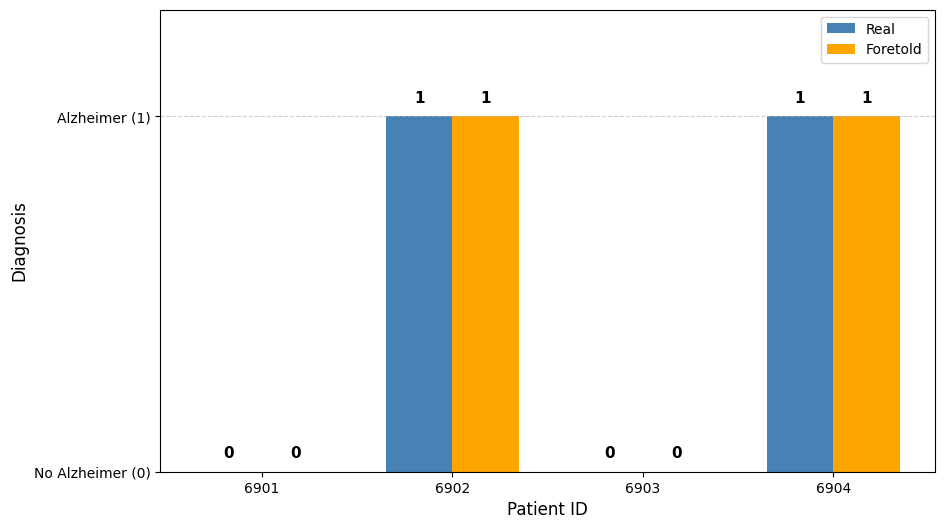

In [16]:
# Data
predicciones = [0,  1, 0, 1]
valores_reales = [0, 1, 0, 1]
pacientes_id = ['6901', '6902', '6903', '6904']

df = pd.DataFrame({
    'Paciente': pacientes_id,
    'Real': valores_reales,
    'Foretold': predicciones
})

# Figure configuration
plt.figure(figsize=(10,6))
bar_width = 0.35
x = range(len(df))

plt.bar([i - bar_width/2 for i in x], df['Real'], width=bar_width, color='steelblue', label='Real')

plt.bar([i + bar_width/2 for i in x], df['Foretold'], width=bar_width, color='orange', label='Foretold')

for i in x:
    plt.text(i - bar_width/2, df['Real'][i]+0.03, str(df['Real'][i]), ha='center', va='bottom', fontsize=11, fontweight='bold')
    plt.text(i + bar_width/2, df['Foretold'][i]+0.03, str(df['Foretold'][i]), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xticks(x, df['Paciente'])
plt.yticks([0,1], ['No Alzheimer (0)', 'Alzheimer (1)'])
plt.ylim(0,1.3)
plt.xlabel('Patient ID', fontsize=12)
plt.ylabel('Diagnosis', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("comparacion_diagnostico.png", dpi=300, bbox_inches='tight')

plt.show()


In the graph, it is clearly observed that the model has correctly predicted the four new cases, which demonstrates its generalization capability and positions it as a robust and reliable model for predicting Alzheimer’s disease risk.

<div id="results" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Results</h2> </div>

| PatientID | Age | MMSE | Family History | Key Symptoms | Alzheimer’s Risk | Prediction Probability (Class 0 / Class 1) |
| --------- | --- | ---- | -------------- | ------------ | ---------------- | ------------------------------------------ |
| 6901      | 72  | 28   | 0              | 1            | Low (0)          | 0.979 / 0.021                              |
| 6903      | 78  | 22   | 1              | 5            | Very High (1)    | 0.026 / 0.974                              |
| 6904      | 70  | 27   | 0              | 0            | Low (0)          | 0.946 / 0.054                              |
| 6905      | 75  | 23   | 1              | 5            | Very High (1)    | 0.020 / 0.980                              |

**Main conclusions:**

* The model correctly predicted the risk class for all five patients, matching the qualitative assessment based on MMSE, family history, and symptoms.

* Patients with a high number of key symptoms and low MMSE (6903 and 6905) show very high probabilities of Alzheimer’s disease (≈97–98%).

* The patient with the lowest risk (6901) has a very low probability of Alzheimer’s disease (≈2%).

* Patient 6902, with moderate risk, shows a probability close to 50%, reflecting an intermediate clinical profile.


<div id="conclusion" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px">
  <h2>Conclusion</h2>
</div>

As a general conclusion, the analysis process demonstrated that evaluating multiple classification models was essential to identify the most suitable approach for predicting Alzheimer’s disease. Among all the evaluated models, XGBoost consistently achieved the best performance, showing superior accuracy and F1-score while effectively handling the moderate class imbalance present in the dataset without requiring additional balancing techniques.

The combination of careful data preprocessing, feature transformation, and the removal of irrelevant attributes enabled XGBoost to learn complex non-linear patterns from the full feature space. Experimental results showed that applying dimensionality reduction through PCA did not improve performance, suggesting that XGBoost benefits from retaining the original feature representation. Furthermore, the application of SMOTE did not lead to performance gains and, in some cases, slightly reduced the model’s effectiveness, confirming that XGBoost inherently manages class imbalance well in this context.

When applied to unseen patient data, XGBoost produced predictions that aligned closely with the expected Alzheimer’s risk, demonstrating robustness and generalization capability. Overall, the systematic approach of model comparison, hyperparameter optimization, and rigorous evaluation was crucial to obtaining reliable and interpretable results. These findings confirm XGBoost as a strong and effective model for Alzheimer’s disease risk prediction in this study.
